# Computer Vision
# Jacobs University Bremen
# Fall 2022
# Homework 3

Object detection by clustering and segmentation.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from skimage import io, filters, util

from sklearn.cluster import MeanShift, estimate_bandwidth, KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs

import collections
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

from itertools import cycle
from PIL import Image


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

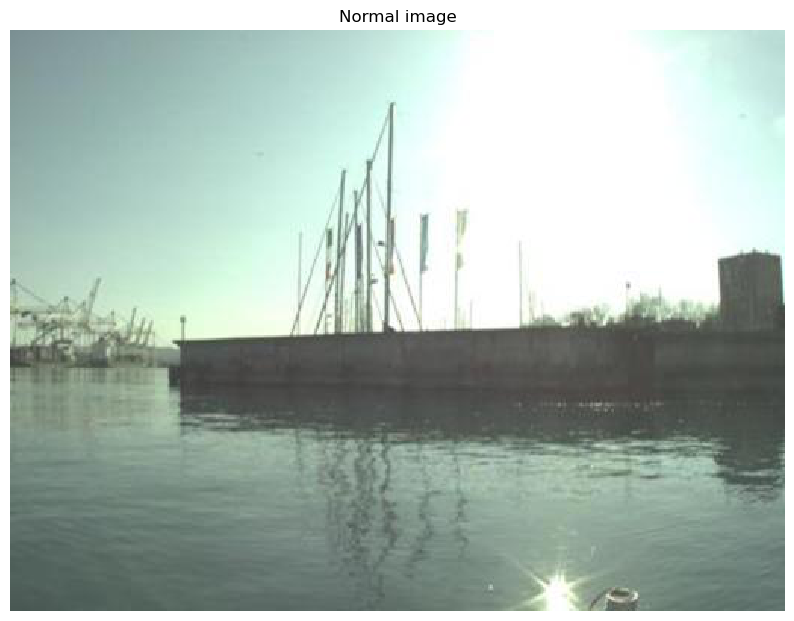

In [2]:
# Open image as grayscale
img = io.imread('0001.jpg')

# Show image
plt.imshow(img)
plt.axis('off')
plt.title("Normal image")
plt.show()

## Part 1: Clustering
### 1.1 Mean Shift Clustering 

Clustering by mean shift algorithm.

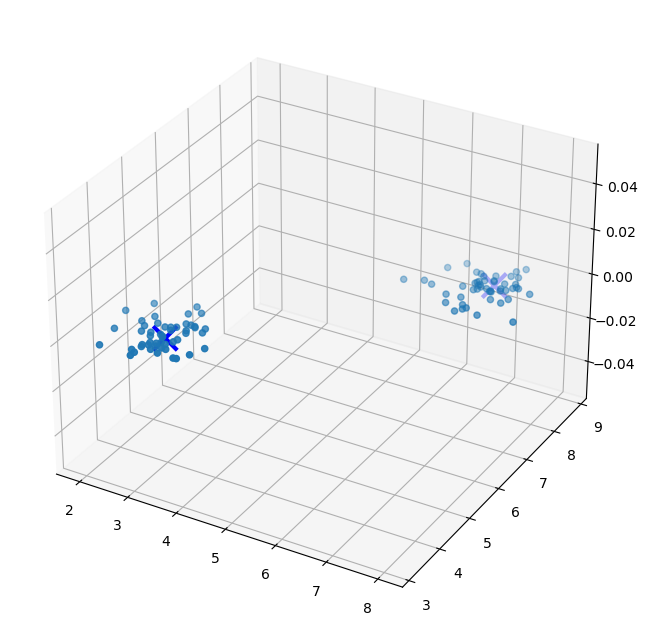

In [3]:
cluster = [[3, 4],[7, 8]]
  
### Creating the values of the cluster to prove the function
point, data = make_blobs(centers = cluster, cluster_std = 0.42)

### Getting the bandwich of the gaussian kernel needed for the Mean-shift
bandwidth = estimate_bandwidth(point, quantile=0.3, n_samples=300)
means = MeanShift(bandwidth=bandwidth)
means.fit(point)
cluster_centers = means.cluster_centers_ 

fg = plt.figure()

###Ploting on the graph the MeanShift 
graph = fg.add_subplot(111,projection='3d')  
graph.scatter(point[:, 0], point[:, 1],  marker ='o') 
graph.scatter(cluster_centers[:, 0],cluster_centers[:, 1], marker ='x', color ='blue', s = 300, linewidth = 3, zorder = 10)
  
plt.show()

### 1.2 Image segmentation by mean-shift algorithm


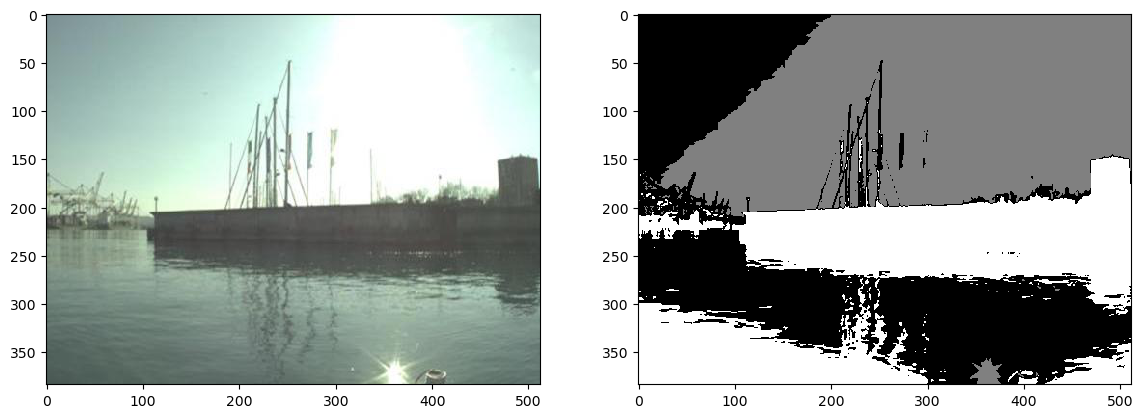

In [66]:
###Using '0001.jpg' as input and getting dimensions
img = io.imread('0001.jpg')
img = np.array(img)
shape = img.shape

### Getting the bandwich of the gaussian kernel needed for the Mean-shift
reshape_img = np.reshape(img, [-1,3])

### Set quantile and n_samples will create the criteria to make the segmentation
bandwidth = estimate_bandwidth(reshape_img, quantile=0.3, n_samples=300)
meansc = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meansc.fit(reshape_img)

###Segmentation process
labels = meansc.labels_
result_img = np.reshape(labels, shape[:2])

###Ploting the images (original and segmentation)
photo = plt.figure(2, figsize=(14, 12))
plotfig = photo.add_subplot(121)
plotfig = plt.imshow(img) 
plotfig = photo.add_subplot(122)
plotfig = plt.imshow(result_img)

plt.show()